# Data Exploration

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [0]:
df.shape # Dimension of data set, (rows, columns)

(614, 13)

In [0]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df.info() # Data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [0]:
df.describe() # Numerical variables summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
df['Property_Area'].value_counts() # Frequency count of categorical data

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
df['ApplicantIncome'].dtypes == 'object'

False

In [4]:
for c in df.columns:
  if df[c].dtypes == 'object':
    print(df[c].value_counts()[:5])

LP001990    1
LP002368    1
LP002950    1
LP001841    1
LP001136    1
Name: Loan_ID, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


# Data Visualisation

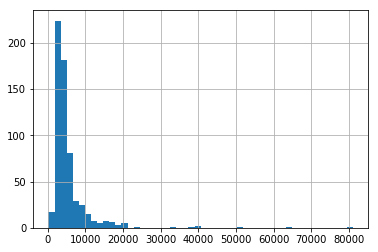

In [0]:
df['ApplicantIncome'].hist(bins=50)

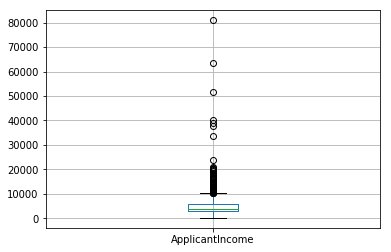

In [0]:
df.boxplot(column='ApplicantIncome')

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


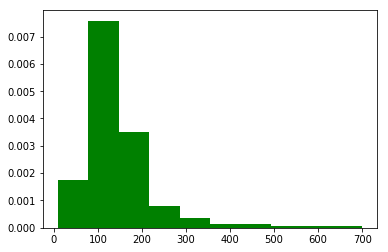

In [0]:
num_bins = 10
plt.hist(df['LoanAmount'], num_bins, normed=1, facecolor='green')
plt.show()

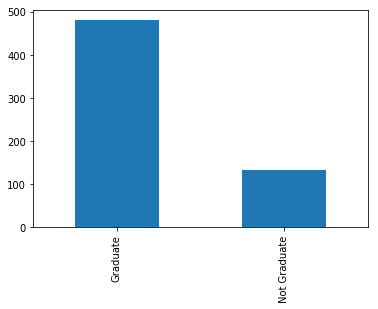

In [14]:
df['Education'].value_counts().plot(kind='bar')

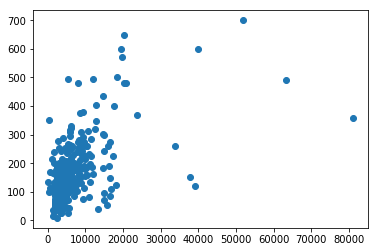

In [15]:
plt.scatter(df.ApplicantIncome, df.LoanAmount)

Further Reading:
https://machinelearningmastery.com/data-visualization-methods-in-python/

# Data Cleaning

In [0]:
df = df.rename(columns = {'ApplicantIncome':'Applicant_Income', 'CoapplicantIncome':'Coapplicant_Income', 'LoanAmount':'Loan_Amount'})

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

## Null Values

In [24]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Loan_Status            0
dtype: int64

## Imputation

In [0]:
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())

In [26]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Loan_Amount_Term      14
Credit_History        50
Loan_Status            0
dtype: int64

In [28]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
df['Self_Employed'].fillna('No',inplace=True)

## Replacing

In [41]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})

In [43]:
df.Gender.value_counts()

0.0    489
1.0    112
Name: Gender, dtype: int64

## Changing dtypes

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                601 non-null float64
Married               611 non-null object
Dependents            599 non-null object
Education             614 non-null object
Self_Employed         614 non-null object
Applicant_Income      614 non-null int64
Coapplicant_Income    614 non-null float64
Loan_Amount           614 non-null float64
Loan_Amount_Term      600 non-null float64
Credit_History        564 non-null float64
Loan_Status           614 non-null object
Loan_Amount_log       614 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 57.6+ KB


In [0]:
df['Gender'] = df['Gender'].astype('object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                601 non-null object
Married               611 non-null object
Dependents            599 non-null object
Education             614 non-null object
Self_Employed         614 non-null object
Applicant_Income      614 non-null int64
Coapplicant_Income    614 non-null float64
Loan_Amount           614 non-null float64
Loan_Amount_Term      600 non-null float64
Credit_History        564 non-null float64
Loan_Status           614 non-null object
Loan_Amount_log       614 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 57.6+ KB


## Transformations

(array([ 2.,  7., 14., 17., 32., 32., 68., 74., 88., 70., 52., 22., 44.,
        14., 11.,  6.,  6.,  7.,  9.,  5.,  4.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  9.  ,  22.82,  36.64,  50.46,  64.28,  78.1 ,  91.92, 105.74,
        119.56, 133.38, 147.2 , 161.02, 174.84, 188.66, 202.48, 216.3 ,
        230.12, 243.94, 257.76, 271.58, 285.4 , 299.22, 313.04, 326.86,
        340.68, 354.5 , 368.32, 382.14, 395.96, 409.78, 423.6 , 437.42,
        451.24, 465.06, 478.88, 492.7 , 506.52, 520.34, 534.16, 547.98,
        561.8 , 575.62, 589.44, 603.26, 617.08, 630.9 , 644.72, 658.54,
        672.36, 686.18, 700.  ]),
 <a list of 50 Patch objects>)

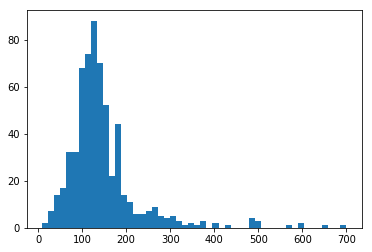

In [32]:
plt.hist(df['Loan_Amount'], 50)

In [0]:
df['Loan_Amount_log'] = np.log(df['Loan_Amount'])

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <a list of 10 Patch objects>)

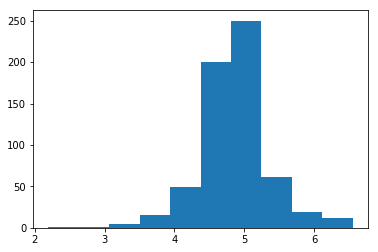

In [36]:
plt.hist(df['Loan_Amount_log'])

## Variable Generation

In [0]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

In [49]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_Amount_log',
       'Total_Income'],
      dtype='object')

## Drop Columns

In [0]:
df = df.drop(['Applicant_Income', 'Coapplicant_Income'], axis = 1)

In [52]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Loan_Amount_log', 'Total_Income'],
      dtype='object')

## Using Imputer

In [0]:
from sklearn.preprocessing import Imputer